### Amazon Sentiment Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import lxmls.readers.sentiment_reader as srs
from lxmls.deep_learning.utils import AmazonData


corpus = srs.SentimentCorpus("books")
data = AmazonData(corpus=corpus)

### Exercise 2.2 Implement Backpropagation for an MLP in Numpy and train it
Instantiate the feed-forward model class and optimization parameters. This models follows the architecture described in Algorithm 7.

In [109]:
# Model
geometry = [corpus.nr_features, 50, 10, 2]
activation_functions = ['sigmoid', 'softmax']

# Optimization
learning_rate = 0.01
num_epochs = 40
batch_size = 30

In [110]:
from lxmls.deep_learning.numpy_models.mlp import NumpyMLP


model = NumpyMLP(
    geometry=geometry,
    activation_functions=activation_functions,
    learning_rate=learning_rate
)

In [76]:
[[print(a.shape) for a in b] for b in model.parameters]

(20, 13989)
(1, 20)
(2, 20)
(1, 2)


[[None, None], [None, None]]

#### Milestone 1:
Open the code for this model. This is located in 

    lxmls/deep_learning/numpy_models/mlp.py
    
Implement the method `backpropagation()` in the class `NumpyMLP` using Backpropagation recursion that we just saw.

As a first step focus on getting the gradients of each layer, one at a time. Use the code below to plot the loss values for the study weight and perturbed versions. 

In [105]:
from lxmls.deep_learning.mlp import get_mlp_parameter_handlers, get_mlp_loss_range

# Get functions to get and set values of a particular weight of the model
get_parameter, set_parameter = get_mlp_parameter_handlers(
    layer_index=1,
    is_bias=False,
    row=0, 
    column=0
)

# Get batch of data
batch = data.batches('train', batch_size=batch_size)[0]

# Get loss and weight value
current_loss = model.cross_entropy_loss(batch['input'], batch['output'])
current_weight = get_parameter(model.parameters)

# Get range of values of the weight and loss around current parameters values
weight_range, loss_range = get_mlp_loss_range(model, get_parameter, set_parameter, batch)

Once you have implemented at least the gradient of the last layer. You can start checking if the values match

In [106]:
# Get the gradient value for that weight
gradients = model.backpropagation(batch['input'], batch['output'])
current_gradient = get_parameter(gradients)

Now you can plot the values of the loss around a given parameters value versus the gradient. If you have implemented this correctly the gradient should be tangent to the loss at the current weight value, see Figure 3.5. Once you have completed the exercise, you should be able to plot also the gradients of the other layers. Take into account that the gradients for the first layer will only be non zero for the indices of words present in the batch. You can locate this using.

In [79]:
# Use this to know the non-zero values of the input (that have non-zero gradient)
batch['input'][0].nonzero()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131]),)

Copy the following code for plotting

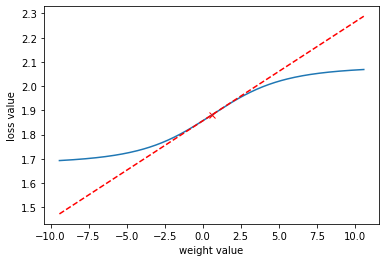

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot empirical
plt.plot(weight_range, loss_range)
plt.plot(current_weight, current_loss, 'xr')
plt.ylabel('loss value')
plt.xlabel('weight value')
# Plot real
h = plt.plot(
    weight_range,
    current_gradient*(weight_range - current_weight) + current_loss, 
    'r--'
)
plt.show()

#### Milestone 2:
After you have ensured that your Backpropagation algorithm is correct, you can train a model with the data we have.

In [111]:
# Get batch iterators for train and test
train_batches = data.batches('train', batch_size=batch_size)
test_set = data.batches('test', batch_size=None)[0]

# Epoch loop
for epoch in range(num_epochs):

    # Batch loop
    for batch in train_batches:
        model.update(input=batch['input'], output=batch['output'])

    # Prediction for this epoch
    hat_y = model.predict(input=test_set['input'])

    # Evaluation
    accuracy = 100*np.mean(hat_y == test_set['output'])

    # Inform user
    print("Epoch %d: accuracy %2.2f %%" % (epoch+1, accuracy))

Epoch 1: accuracy 54.00 %
Epoch 2: accuracy 56.25 %
Epoch 3: accuracy 57.75 %
Epoch 4: accuracy 60.00 %
Epoch 5: accuracy 63.25 %
Epoch 6: accuracy 64.50 %
Epoch 7: accuracy 66.00 %
Epoch 8: accuracy 68.25 %
Epoch 9: accuracy 69.00 %
Epoch 10: accuracy 69.75 %
Epoch 11: accuracy 70.75 %
Epoch 12: accuracy 72.50 %
Epoch 13: accuracy 74.75 %
Epoch 14: accuracy 75.25 %
Epoch 15: accuracy 75.25 %
Epoch 16: accuracy 76.25 %
Epoch 17: accuracy 77.00 %
Epoch 18: accuracy 78.00 %
Epoch 19: accuracy 78.75 %
Epoch 20: accuracy 79.00 %
Epoch 21: accuracy 79.50 %
Epoch 22: accuracy 80.00 %
Epoch 23: accuracy 80.50 %
Epoch 24: accuracy 80.25 %
Epoch 25: accuracy 80.50 %
Epoch 26: accuracy 80.50 %
Epoch 27: accuracy 81.00 %
Epoch 28: accuracy 81.25 %
Epoch 29: accuracy 81.25 %
Epoch 30: accuracy 81.25 %
Epoch 31: accuracy 81.50 %
Epoch 32: accuracy 81.25 %
Epoch 33: accuracy 81.50 %
Epoch 34: accuracy 81.75 %
Epoch 35: accuracy 81.75 %
Epoch 36: accuracy 81.75 %
Epoch 37: accuracy 81.75 %
Epoch 38: 